# 10 - Solving Second-order Ordinary Differential Equations (ODEs)<br>*(Ch. 8.3)*

A second-order ODE contains the second derivative of one of the variables. In general, this can be written as:

\begin{equation*} \frac{\textrm{d}^2x}{\mathrm{d}t^2} = f(x,t) \end{equation*}

Our free-fall problem is a second-order differential equation

\begin{equation*} \frac{\textrm{d}^2y}{\mathrm{d}t^2} = -g \end{equation*}

Note that we can equivalently write this as:

\begin{equation*} \frac{\textrm{d}}{\mathrm{d}t} \left( \frac{\textrm{d}y}{\mathrm{d}t} \right) = -g \end{equation*}

The trick here is to rewrite this second order ODE as *two coupled first order ODEs*:

\begin{equation*} \begin{aligned} \frac{\textrm{d}y}{\mathrm{d}t} &= v_y \\ \frac{\textrm{d}v_y}{\mathrm{d}t} &= -g  \end{aligned}\end{equation*}

We already know how to solve systems of equations like this!

**Let's use the RK4 algorithm to solve the free-fall problem!** Note that we no longer need to assume an exact solution for the velocity!


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

g = 9.8

def f(r,t):
    # r is a 2D array, so first pull out the vals
    y,vy = r[0],r[1]
    fy = vy
    fv = -g
    return np.array([fy,fv],float)

y0 = 0.0
vy0 = 10.0
t0 = 0.0     
tf = 3.0    
N = 10
h = (tf-t0)/N 
 
tpoints = np.arange(t0,tf,h)
ypoints = []
vypoints = []

# set up array with initial values x0,y0
r = np.array([y0,vy0],float)

for t in tpoints:
    ypoints.append(r[0])
    vypoints.append(r[1])
    # Below we've just changed `x` into `r`
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    if r[0] <= 0:
        r[0]=0.0
        r[1]=0.0
    
plt.figure(dpi=100)            
plt.plot(tpoints,ypoints,'k-',label='$y$ (m)')  
plt.plot(tpoints,vypoints,'b--',label='$v_y$ (m/s)')
plt.xlabel('t')

#Calculate exact solution for comparison
y_th=y0+vy0*tpoints+0.5*(-g)*tpoints**2
v_th=vy0+(-g)*tpoints
v_th[y_th<0]=0
y_th[y_th<0]=0

plt.plot(tpoints,y_th,'g:',label='$y$ (m) theoretical')
plt.plot(tpoints, v_th,'k-.',label='$v_y$ (m/s) theoretical')


plt.legend(loc='best')
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## Example: Harmonic oscillator
Another classic example from physics is a simple harmonic oscillator (e.g., a mass on a spring):

\begin{equation*} \frac{\textrm{d}^2x}{\mathrm{d}t^2} = -kx \end{equation*}

which can be written as:

\begin{equation*} \begin{aligned} \frac{\textrm{d}x}{\mathrm{d}t} &= b \\ \frac{\textrm{d}b}{\mathrm{d}t} &= -kx  \end{aligned} \end{equation*}

**Modify the free-fall program above to handle this new scenario, assuming that $k=2.0$ N/m and a starting displacement of $x(t=0)=1.0$ meters.**

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
**Pre-generated solution:**

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(r,t):
    x,y = r[0],r[1]
    fx = y                          # NEW: DEFINE NEW FUNCTIONS fx, fy!
    fy = -k*x
    return np.array([fx,fy],float)

a = 0.0     
b = 10.0    
N = 1000
h = (b-a)/N 
k = 2.0                            # NEW: DEFINE k!

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

r = np.array([1.0,0.0],float)      # NEW: DEFINE INIT. POSITION, VELOCITY

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
plt.figure(dpi=100)            
plt.plot(tpoints,xpoints,'b-')     # NEW: PLOT POSITION VS. TIME
plt.xlabel('t')
plt.ylabel('position (m)')
plt.show()

# We see a sine curve, as expected!

<br><br><br><br><br><br><br><br><br><br><br><br><br>

## Exercise

The simple pendulum consists of a point mass attached to the end of a light, rigid rod that is free to pivot on a 2D plane:

![](images/simplependulum.jpg)

The equation of motion for a simple pendulum is

\begin{equation*} \frac{\textrm{d}^2\theta}{\mathrm{d}t^2} = -\frac gl \sin\theta \end{equation*}

In introductory physics classes, we often assume that $\theta$ is small, so $\sin\theta \approx \theta$, giving

\begin{equation*}  \frac{\textrm{d}^2\theta}{\mathrm{d}t^2} = -\frac gl \theta \end{equation*}

In this case the simple pendulum displays simple harmonic motion.

If $\theta$ is *not* small, there is no analytical solution to the equation and we *must* use a computer to see what happens!

## Exercise: Modify your program from above to plot $\theta$ vs. $t$.
Use the the following initial conditions:

\begin{equation*}  \frac{\textrm{d}\theta}{\mathrm{d}t} = 0 \frac{\text{rad}}{\text{sec}} \quad , \quad \theta = .05\pi \text{ rad}\end{equation*}

Use $g=9.81$ and $L=0.1$.

## Exercise: Modify the above program and examine the pendulum behavior as $\theta_0$ gets larger (all the way up to $\theta_0=0.99\pi$)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## We can make an animation to show this motion!

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Bonus fun time:

Suppose we have a *driven pendulum*, where

\begin{equation*} \frac{\textrm{d}^2\theta}{\mathrm{d}t^2} = -\frac gl \sin\theta + C\cos\theta\sin\Omega t \end{equation*}

1. Consider $C=2$, $\Omega = 5$, and start the pendulum from rest and hanging vertically. Plot the displacement vs. time for 100 seconds. 

2. Change $\Omega$ to observe the effect of different *driving frequencies* on the behavior of the pendulum. $\Omega=10.5$ is one interesting example.

<br><br><br><br><br><br><br><br><br><br><br><br>

### Pre-written solution:

Note:
\begin{equation*} \begin{aligned} \frac{\textrm{d}\theta}{\mathrm{d}t} &= \omega \\ \frac{\textrm{d}\omega}{\mathrm{d}t} &= -\frac gl \sin\theta  \end{aligned}\end{equation*}

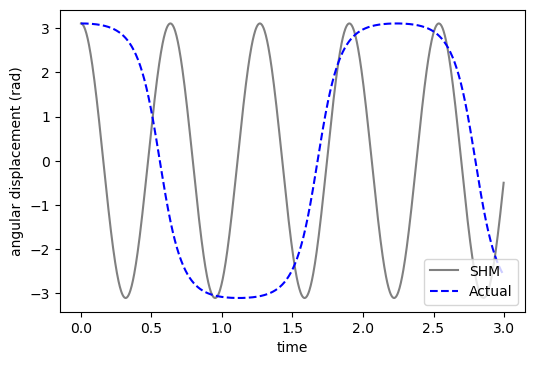

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f(r,t):
    theta,omega = r[0],r[1]
    f_theta = omega                          
    f_omega = -(g/L)*np.sin(theta)
#    f_omega = -(g/L)*np.sin(theta) + C*np.cos(theta)*np.sin(OMEGA*t)
    return np.array([f_theta,f_omega],float)

a = 0.0     
b = 3.0    
N = 1000
h = (b-a)/N 
g = 9.81
L = 0.1
C = 0
OMEGA = 5
pct0 = .99

tpoints = np.arange(a,b,h)
theta_points = []
omega_points = []

r = np.array([pct0*np.pi,0.0],float)      

for t in tpoints:
    theta_points.append(r[0])
    omega_points.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
#SHO
thy = [pct0*np.pi*np.sin(((g/L)**0.5*t)+0.5*np.pi) for t in tpoints]


plt.figure(dpi=100)            
plt.plot(tpoints,thy,'0.5',label='SHM')
plt.plot(tpoints,theta_points,'b--',label='Actual')     
plt.xlabel('time')
plt.ylabel('angular displacement (rad)')
plt.legend(loc='lower right')
plt.show()

### Animation:

In [3]:
#Uses data (list named theta_points) from previous program
import vpython as vp     # get VPython modules for animation
scene = vp.canvas() # Needed to start a new Vpython display for the current code cell

# draw the ball at (0,0,0) 
ball = vp.sphere(pos=vp.vector(0,-L,0), radius=.01, color=vp.color.yellow) # ball  
rod = vp.cylinder(pos=vp.vector(0,0,0),axis=vp.vector(0,-L,0), radius=.001, color=vp.color.red)
floor = vp.box(pos=vp.vector(0,0,0), length=.05, height=0.0005, width=.05)    # floor 

for i in range(np.size(theta_points)):
    vp.rate(50)
    ball.pos.y = -L*np.cos(theta_points[i])
    ball.pos.x = -L*np.sin(theta_points[i])
    rod.axis.x = ball.pos.x
    rod.axis.y = ball.pos.y
    


<IPython.core.display.Javascript object>